In [1]:
import sqlite3
import pandas as pd


In [2]:
conn = sqlite3.connect('Data/football_database.db')

query = "SELECT * FROM Matches"

df_matches = pd.read_sql_query(query, conn)

conn.close()

In [3]:
df_matches

,fixture_id,competition_name,season,home_team,away_team,home_goals,away_goals,match_date,match_time,match_status,home_team_formation,away_team_formation
0,208914,Bundesliga,2019,FC Bayern München,Hertha Berlin,2,2,16.08.2019,20:30,FT,4-3-3,3-4-1-2
1,208915,Bundesliga,2019,Borussia Dortmund,FC Augsburg,5,1,17.08.2019,15:30,FT,4-2-3-1,4-2-3-1
2,208916,Bundesliga,2019,Bayer 04 Leverkusen,Paderborn,3,2,17.08.2019,15:30,FT,3-4-3,4-4-2
3,208917,Bundesliga,2019,VfL Wolfsburg,FC Köln,2,1,17.08.2019,15:30,FT,3-4-2-1,4-2-3-1
4,208918,Bundesliga,2019,Werder Bremen,Fortuna Düsseldorf,1,3,17.08.2019,15:30,FT,4-3-3,4-2-3-1
...,...,...,...,...,...,...,...,...,...,...,...,...
17062,37928,Ligue 1,2018,Nantes,Strasbourg,0,1,24.05.2019,21:05,FT,4-3-3,3-5-1-1
17063,37929,Ligue 1,2018,Nice,Monaco,2,0,24.05.2019,21:05,FT,4-3-3,4-2-3-1
17064,37930,Ligue 1,2018,Nimes,Lyon,2,3,24.05.2019,21:05,FT,4-3-3,4-2-3-1
17065,37931,Ligue 1,2018,Reims,Paris Saint Germain,3,1,24.05.2019,21:05,FT,4-2-3-1,4-3-3


In [4]:
conn = sqlite3.connect('Data/football_database.db')

query = "SELECT * FROM Odds"

df_odds = pd.read_sql_query(query, conn)

conn.close()

In [5]:
df_merged_matches_odds = df_matches.merge(df_odds[['fixture_id', 'home_odds', 'draw_odds', 'away_odds']], on='fixture_id', how='inner')


In [6]:
df_merged_matches_odds

,fixture_id,competition_name,season,home_team,away_team,home_goals,away_goals,match_date,match_time,match_status,home_team_formation,away_team_formation,home_odds,draw_odds,away_odds
0,208914,Bundesliga,2019,FC Bayern München,Hertha Berlin,2,2,16.08.2019,20:30,FT,4-3-3,3-4-1-2,1.17,8.03,15.42
1,208915,Bundesliga,2019,Borussia Dortmund,FC Augsburg,5,1,17.08.2019,15:30,FT,4-2-3-1,4-2-3-1,1.16,7.93,18.73
2,208916,Bundesliga,2019,Bayer 04 Leverkusen,Paderborn,3,2,17.08.2019,15:30,FT,3-4-3,4-4-2,1.25,6.46,11.06
3,208917,Bundesliga,2019,VfL Wolfsburg,FC Köln,2,1,17.08.2019,15:30,FT,3-4-2-1,4-2-3-1,2.07,3.53,3.61
4,208918,Bundesliga,2019,Werder Bremen,Fortuna Düsseldorf,1,3,17.08.2019,15:30,FT,4-3-3,4-2-3-1,1.68,4.12,4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12597,37928,Ligue 1,2018,Nantes,Strasbourg,0,1,24.05.2019,21:05,FT,4-3-3,3-5-1-1,1.94,3.71,3.79
12598,37929,Ligue 1,2018,Nice,Monaco,2,0,24.05.2019,21:05,FT,4-3-3,4-2-3-1,3.41,3.38,2.18
12599,37930,Ligue 1,2018,Nimes,Lyon,2,3,24.05.2019,21:05,FT,4-3-3,4-2-3-1,3.78,4.16,1.84
12600,37931,Ligue 1,2018,Reims,Paris Saint Germain,3,1,24.05.2019,21:05,FT,4-2-3-1,4-3-3,6.7,5.45,1.4


In [7]:
import pandas as pd
import numpy as np

# Function that returns the favorite team (with the best odds)
def get_favorite(row):
    if row['home_odds'] < row['away_odds']:
        return 'home'
    else:
        return 'away'
    
# Function that returns the underdog team (with the worst odds)
def get_underdog(row):
    if row['home_odds'] > row['away_odds']:
        return 'home'
    else:
        return 'away'
    
# Function that calculates the result of the game
def get_result(row):
    if row['home_goals'] > row['away_goals']:
        return 'home'  # home team won
    elif row['home_goals'] < row['away_goals']:
        return 'away'  # away team won
    else:
        return 'draw'  # draw

def calculate_margin(row, bet_target, bet_amount = 10):
    try:
        if bet_target == 'draw':
            if row['result'] == 'X':
                return bet_amount * float(row['draw_odds']) - bet_amount  # win, so return profit
            else:
                return -bet_amount  # loss, so return loss
        elif bet_target == 'favorite':
            odds = row['home_odds'] if row['favorite'] == 'home' else row['away_odds']
            if row['favorite'] == row['result']:
                return bet_amount * float(odds) - bet_amount  # win, so return profit
            else:
                return -bet_amount  # loss, so return loss
        else:  # bet_target is 'underdog'
            odds = row['home_odds'] if row['underdog'] == 'home' else row['away_odds']
            if row['underdog'] == row['result']:
                return bet_amount * float(odds) - bet_amount  # win, so return profit
            else:
                return -bet_amount  # loss, so return loss
    except ValueError as e:
        return None

def add_betting_info(df):
    df = df.copy()  # make a copy of the dataframe to avoid changing the original dataframe
    df['favorite'] = df.apply(get_favorite, axis=1)
    df['underdog'] = df.apply(get_underdog, axis=1)
    df['result'] = df.apply(get_result, axis=1)
    return df




def bet_on(df, bet_target, bet_amount = 10):
    df['win_margin_bet_on_'+bet_target] = df.apply(calculate_margin, args=(bet_target, bet_amount), axis=1)
    return df


In [8]:
df_merged_matches_odds = add_betting_info(df_merged_matches_odds)
df_joined = bet_on(df_merged_matches_odds, bet_target='favorite', bet_amount=10)  # bet on favorite
df_joined = bet_on(df_merged_matches_odds, bet_target='underdog', bet_amount=10)  # bet on underdog
df_joined = bet_on(df_merged_matches_odds, bet_target='draw', bet_amount=10)  # bet on draw


In [9]:
df_joined.head()

,fixture_id,competition_name,season,home_team,away_team,home_goals,away_goals,match_date,match_time,match_status,...,away_team_formation,home_odds,draw_odds,away_odds,favorite,underdog,result,win_margin_bet_on_favorite,win_margin_bet_on_underdog,win_margin_bet_on_draw
0,208914,Bundesliga,2019,FC Bayern München,Hertha Berlin,2,2,16.08.2019,20:30,FT,...,3-4-1-2,1.17,8.03,15.42,home,away,draw,-10.0,-10.0,-10
1,208915,Bundesliga,2019,Borussia Dortmund,FC Augsburg,5,1,17.08.2019,15:30,FT,...,4-2-3-1,1.16,7.93,18.73,home,away,home,1.6,-10.0,-10
2,208916,Bundesliga,2019,Bayer 04 Leverkusen,Paderborn,3,2,17.08.2019,15:30,FT,...,4-4-2,1.25,6.46,11.06,home,away,home,2.5,-10.0,-10
3,208917,Bundesliga,2019,VfL Wolfsburg,FC Köln,2,1,17.08.2019,15:30,FT,...,4-2-3-1,2.07,3.53,3.61,home,away,home,10.7,-10.0,-10
4,208918,Bundesliga,2019,Werder Bremen,Fortuna Düsseldorf,1,3,17.08.2019,15:30,FT,...,4-2-3-1,1.68,4.12,4.85,home,away,away,-10.0,38.5,-10


In [10]:
total_win_margin_favorite = df_joined['win_margin_bet_on_favorite'].sum()
total_win_margin_underdog = df_joined['win_margin_bet_on_underdog'].sum()
total_win_margin_draw = df_joined['win_margin_bet_on_draw'].sum()
print(total_win_margin_favorite, total_win_margin_underdog, total_win_margin_draw)

-4570.7 -9108.0 -126020


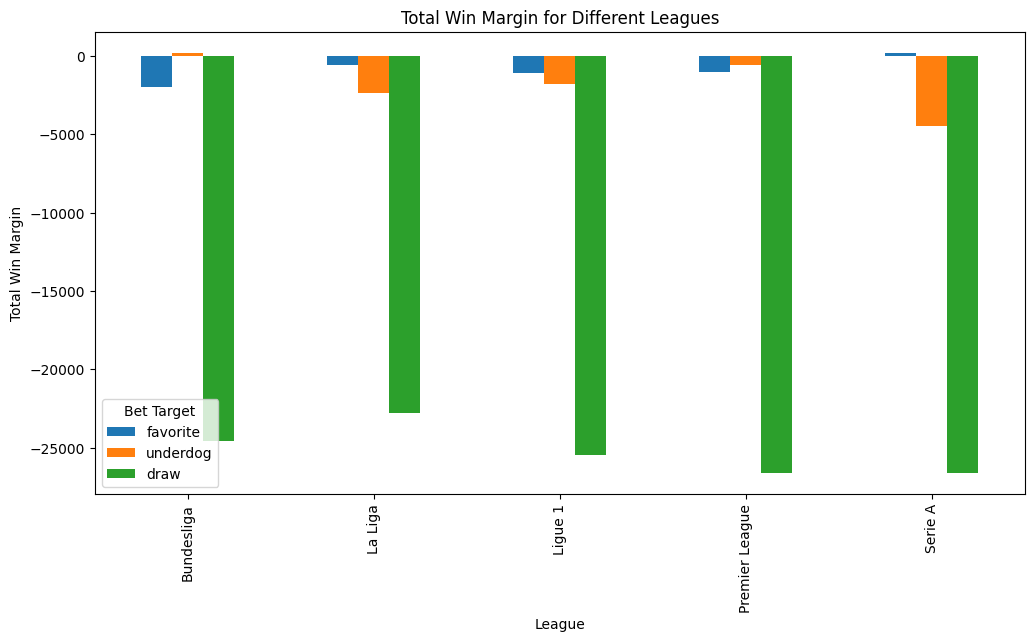

In [11]:
import matplotlib.pyplot as plt

# Group by 'competition_name' and calculate the sum of 'win_margin_bet_on_X'
grouped_favorite = df_joined.groupby('competition_name')['win_margin_bet_on_favorite'].sum()
grouped_underdog = df_joined.groupby('competition_name')['win_margin_bet_on_underdog'].sum()
grouped_draw = df_joined.groupby('competition_name')['win_margin_bet_on_draw'].sum()

merged = pd.concat([grouped_favorite, grouped_underdog, grouped_draw], axis=1)
merged.columns = ['favorite', 'underdog', 'draw']

merged.plot(kind='bar', figsize=(12, 6))

plt.title('Total Win Margin for Different Leagues')
plt.xlabel('League')
plt.ylabel('Total Win Margin')
plt.legend(title="Bet Target")
plt.show()


In [12]:
conn = sqlite3.connect('Data/football_database.db')

query = "SELECT * FROM Match_Statistics"
df_match_statistics = pd.read_sql_query(query, conn)

query = "SELECT * FROM Players"
df_players = pd.read_sql_query(query, conn)

query = "SELECT * FROM Player_Statistics"
df_player_statistics = pd.read_sql_query(query, conn)

query = "SELECT * FROM StartingXI"
df_starting_xi = pd.read_sql_query(query, conn)

query = "SELECT * FROM Substitutes"
df_substitutes = pd.read_sql_query(query, conn)

conn.close()

In [54]:
# Create dictionaries to store the streaks and seasons (to reset streak on new season start)
home_streaks = {}
away_streaks = {}
home_seasons = {}
away_seasons = {}

def calculate_winning_streak(df):
    # Convert 'match_date' to datetime
    df['match_date'] = pd.to_datetime(df['match_date'], format='%d.%m.%Y')
    df = df.sort_values('match_date')

    for i, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        result = row['result']
        season = row['season']
        
        # Check if the teams have played before, if not set their streaks to 0
        home_streaks.setdefault(home_team, 0)
        away_streaks.setdefault(away_team, 0)
        home_seasons.setdefault(home_team, season)
        away_seasons.setdefault(away_team, season)

        # Reset the streak if the season has changed
        if home_seasons[home_team] != season:
            home_streaks[home_team] = 0
            home_seasons[home_team] = season
        if away_seasons[away_team] != season:
            away_streaks[away_team] = 0
            away_seasons[away_team] = season

        # Store the streaks in the DataFrame
        df.at[i, 'home_winning_streak'] = home_streaks[home_team]
        df.at[i, 'away_winning_streak'] = away_streaks[away_team]

        # Update the streaks based on the game result
        # If the home team won, increase their streak and reset the away team's streak
        if result == 'home':
            home_streaks[home_team] += 1
            away_streaks[away_team] = 0
        # If the away team won, increase their streak and reset the home team's streak
        elif result == 'away':
            away_streaks[away_team] += 1
            home_streaks[home_team] = 0
        # If it was a draw, reset both team's streaks
        else:
            home_streaks[home_team] = 0
            away_streaks[away_team] = 0

    return df


In [55]:
df_sorted = calculate_winning_streak(df_joined)
df_sorted.reset_index(inplace=True, drop=True)
df_sorted['goal_difference'] = df_sorted['home_goals'] - df_sorted['away_goals']
df_sorted.to_csv("test.csv", index=False)


In [56]:
df_sorted['fixture_id'] = df_sorted['fixture_id'].astype('int64')

# drop season 2010 in data cleaning
df_match_merged_stats = df_sorted.merge(df_match_statistics, on="fixture_id")

print(df_match_merged_stats.columns)

Index(['fixture_id', 'competition_name', 'season', 'home_team', 'away_team',
       'home_goals_x', 'away_goals_x', 'match_date', 'match_time',
       'match_status', 'home_team_formation', 'away_team_formation',
       'home_odds', 'draw_odds', 'away_odds', 'favorite', 'underdog', 'result',
       'win_margin_bet_on_favorite', 'win_margin_bet_on_underdog',
       'win_margin_bet_on_draw', 'home_winning_streak', 'away_winning_streak',
       'goal_difference', 'home_shots_on_goal', 'home_shots_off_goal',
       'home_total_shots', 'home_blocked_shots', 'home_shots_insidebox',
       'home_shots_outsidebox', 'home_fouls', 'home_corner_kicks',
       'home_offsides', 'home_ball_possession', 'home_yellow_cards',
       'home_red_cards', 'home_goalkeeper_saves', 'home_total_passes',
       'home_passes_accurate', 'home_passes_percent', 'away_shots_on_goal',
       'away_shots_off_goal', 'away_total_shots', 'away_blocked_shots',
       'away_shots_insidebox', 'away_shots_outsidebox', 'away_

In [57]:
# Convert '-' to NaN, then drop these rows
df = df_match_merged_stats.replace('-', np.nan)
df = df.dropna(subset=['home_odds', 'draw_odds', 'away_odds'])

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Specify the features and target variable
target_feature = "result"
features = ['home_odds', 'draw_odds', 'away_odds', 'home_winning_streak', 'away_winning_streak']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_feature], test_size=0.2, random_state=42)

# Initialize the models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

models = [lr, dt, rf]

# Iterate over models
for model in models:
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Training Accuracy: {acc_train}")
    print(f"Test Accuracy: {acc_test}\n")


Model: LogisticRegression
Training Accuracy: 0.5398076135898485
Test Accuracy: 0.5306873977086743

Model: DecisionTreeClassifier
Training Accuracy: 0.9983626688497749
Test Accuracy: 0.42430441898527005

Model: RandomForestClassifier
Training Accuracy: 0.9983626688497749
Test Accuracy: 0.48731587561374795

